<a href="https://colab.research.google.com/github/annakasper1/QNC/blob/main/Modeling_Model_Fitting_Exercise_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Purpose: Define initial conditions and objective function for fitting LATER model to RT data**

Notes:
- receiprocal of reaction time = 1/RT

LATER model paramenters:
- muR = mean rate of rise
- deltaS = standard deviation of the start signal

Gaussian parameters
- mu = muR/deltaS
- sigma = 1/delta S

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

In [31]:
from google.colab import files
uploaded = files.upload()

In [33]:
# Step 1: Get the later_getData uploaded


from scipy.io import loadmat
import numpy as np

# Load the .mat file
mat_data = loadmat('JT_RT.mat')

# Extract the RT data (assuming it's stored under 'tRxnSum')
RTs = mat_data['tRxnSum'].flatten()  # Flatten in case it's a 2D array

# Optional: remove non-positive RTs (e.g., outliers or invalid trials)
RTs = RTs[RTs > 0]



In [34]:
# Step 2: Define the objective function (negative log-likelihood)
def later_neg_log_likelihood(fits):
    muR, deltaS = fits
    if muR <= 0 or deltaS <= 0:
        return np.inf # return a large number if parameters are invalid
    mu = muR / deltaS
    sigma = 1 / deltaS
    inv_rts = 1 / RTs
    log_likelihoods = norm.logpdf(inv_rts, loc=mu, scale=sigma) # Get log probability of each 1/RT
    return -np.sum(log_likelihoods) # Return negative sum of log-likelihoods


In [35]:
# Step 3: Define initial conditions and bounds
initial_muR = np.mean(1 / RTs)
initial_deltaS = 1 / np.std(1 / RTs)
initial_values = [initial_muR, initial_deltaS]
bounds = [(0.001, 1000), (0.001, 1000)]


In [36]:
# EXERCISE - Step 4: Run the optimization, which takes the objective function to find muR and deltaS to maximize the likelihood of the data under the model.
# In other words, the optimizer finds the best-fitting parameters.

result = minimize(later_neg_log_likelihood, initial_values, bounds=bounds, method='L-BFGS-B')
fitted_muR, fitted_deltaS = result.x


In [37]:
# Step 5: Evaluate the fits
fitted_mu = fitted_muR / fitted_deltaS
fitted_sigma = 1 / fitted_deltaS
inv_rt_vals = np.linspace(min(1/RTs), max(1/RTs), 100)
pdf_vals = norm.pdf(inv_rt_vals, loc=fitted_mu, scale=fitted_sigma)


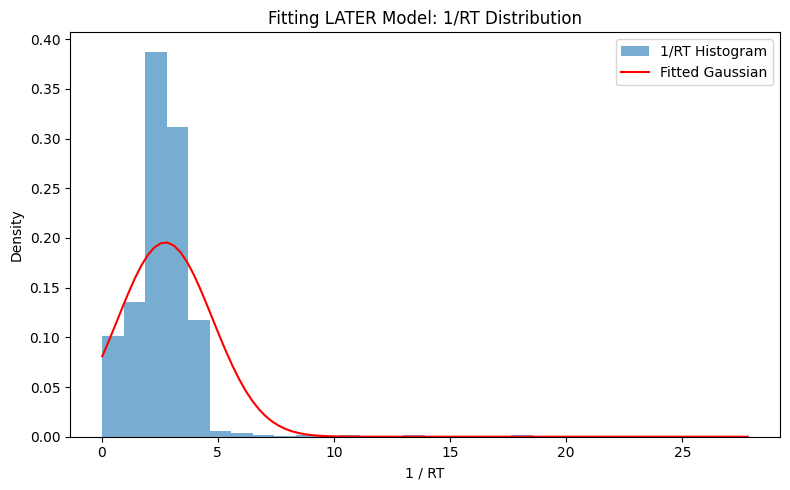

In [38]:
# Plot histogram of 1/RT and fitted Gaussian
plt.figure(figsize=(8, 5))
plt.hist(1 / RTs, bins=30, density=True, alpha=0.6, label='1/RT Histogram') # Histogram of 1/RT
plt.plot(inv_rt_vals, pdf_vals, 'r-', label='Fitted Gaussian')
plt.xlabel('1 / RT')
plt.ylabel('Density')
plt.title('Fitting LATER Model: 1/RT Distribution')
plt.legend()
plt.tight_layout()


In [39]:
# Print fitted parameters and final negative log-likelihood
print(f"Fitted muR: {fitted_muR:.4f}")
print(f"Fitted deltaS: {fitted_deltaS:.4f}")
print(f"Final negative log-likelihood: {result.fun:.4f}")

Fitted muR: 1.3422
Fitted deltaS: 0.4903
Final negative log-likelihood: 8313.8989


EXERCISE: How do I know if I got a reasonable answer?

It seems pretty reasonable, apart from the extreme middle values.